In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import correlate
import pyroomacoustics as pra
import soundfile as sf
from IPython.display import Audio
from scipy.fft import fft, ifft
from scipy.signal import correlate
import seaborn as sns

import doascripts as doa
import simscripts as sim
import plotting as pt
import measuring as meas

# Generación de diccionarios

Se define el diccionario base a partir del cual se ajustarán los parámetros pertenecientes a la simulación.

In [2]:
dicc_base = {
    "room_dim": [5, 5, 5], 
    "rt60": 0.5,
    "mic_amount": 4,
    "mic_start": [1, 1, 2.5],
    "mic_dist": 0.1,
    "source_pos": [2.5, 2.5, 2.5],
    "fs": 48000,
    "snr" : 0}

# Expansión de SNR

In [3]:
sim.expand_param(dicc_base, "snr", [80, 10], n=50, filename = "variacion_snr")

{'room_dim': [5, 5, 5],
 'rt60': 0.5,
 'mic_amount': 4,
 'mic_start': [1, 1, 2.5],
 'mic_dist': 0.1,
 'source_pos': [2.5, 2.5, 2.5],
 'fs': 48000,
 'snr': [80.0,
  78.571429,
  77.142857,
  75.714286,
  74.285714,
  72.857143,
  71.428571,
  70.0,
  68.571429,
  67.142857,
  65.714286,
  64.285714,
  62.857143,
  61.428571,
  60.0,
  58.571429,
  57.142857,
  55.714286,
  54.285714,
  52.857143,
  51.428571,
  50.0,
  48.571429,
  47.142857,
  45.714286,
  44.285714,
  42.857143,
  41.428571,
  40.0,
  38.571429,
  37.142857,
  35.714286,
  34.285714,
  32.857143,
  31.428571,
  30.0,
  28.571429,
  27.142857,
  25.714286,
  24.285714,
  22.857143,
  21.428571,
  20.0,
  18.571429,
  17.142857,
  15.714286,
  14.285714,
  12.857143,
  11.428571,
  10.0]}

# Expansión de RT60

In [18]:
sim.expand_param(dicc_base, "rt60", 0.2, n=50, filename = "variacion_rt60")

{'room_dim': [5, 5, 5],
 'rt60': [0.5, 0.7],
 'mic_amount': 4,
 'mic_start': [1, 1, 2.5],
 'mic_dist': 0.1,
 'source_pos': [2.5, 2.5, 2.5],
 'fs': 48000,
 'snr': 0}

# Expansión de posición de micrófonos (eje x)

In [5]:
sim.expand_param(dicc_base, "mic_start", ([0, 1, 2.5], [5, 1, 2.5]), n=50, filename = "variacion_mic_pos")

{'room_dim': [5, 5, 5],
 'rt60': 0.5,
 'mic_amount': 4,
 'mic_start': [[0.0, 1.0, 2.5],
  [0.102041, 1.0, 2.5],
  [0.204082, 1.0, 2.5],
  [0.306122, 1.0, 2.5],
  [0.408163, 1.0, 2.5],
  [0.510204, 1.0, 2.5],
  [0.612245, 1.0, 2.5],
  [0.714286, 1.0, 2.5],
  [0.816327, 1.0, 2.5],
  [0.918367, 1.0, 2.5],
  [1.020408, 1.0, 2.5],
  [1.122449, 1.0, 2.5],
  [1.22449, 1.0, 2.5],
  [1.326531, 1.0, 2.5],
  [1.428571, 1.0, 2.5],
  [1.530612, 1.0, 2.5],
  [1.632653, 1.0, 2.5],
  [1.734694, 1.0, 2.5],
  [1.836735, 1.0, 2.5],
  [1.938776, 1.0, 2.5],
  [2.040816, 1.0, 2.5],
  [2.142857, 1.0, 2.5],
  [2.244898, 1.0, 2.5],
  [2.346939, 1.0, 2.5],
  [2.44898, 1.0, 2.5],
  [2.55102, 1.0, 2.5],
  [2.653061, 1.0, 2.5],
  [2.755102, 1.0, 2.5],
  [2.857143, 1.0, 2.5],
  [2.959184, 1.0, 2.5],
  [3.061224, 1.0, 2.5],
  [3.163265, 1.0, 2.5],
  [3.265306, 1.0, 2.5],
  [3.367347, 1.0, 2.5],
  [3.469388, 1.0, 2.5],
  [3.571429, 1.0, 2.5],
  [3.673469, 1.0, 2.5],
  [3.77551, 1.0, 2.5],
  [3.877551, 1.0, 2.5],
  [3

# Expansión de cantidad de micrófonos

In [6]:
sim.expand_param(dicc_base, "mic_amount", [2, 40], n=39, filename = "variacion_mic_amount")

{'room_dim': [5, 5, 5],
 'rt60': 0.5,
 'mic_amount': [2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0],
 'mic_start': [1, 1, 2.5],
 'mic_dist': 0.1,
 'source_pos': [2.5, 2.5, 2.5],
 'fs': 48000,
 'snr': 0}

# Expansión distancia microfonos

In [7]:
sim.expand_param(dicc_base, "mic_dist", [0.05, 0.50], n=50, filename = "distancia_mics")

{'room_dim': [5, 5, 5],
 'rt60': 0.5,
 'mic_amount': 4,
 'mic_start': [1, 1, 2.5],
 'mic_dist': [0.05,
  0.059184,
  0.068367,
  0.077551,
  0.086735,
  0.095918,
  0.105102,
  0.114286,
  0.123469,
  0.132653,
  0.141837,
  0.15102,
  0.160204,
  0.169388,
  0.178571,
  0.187755,
  0.196939,
  0.206122,
  0.215306,
  0.22449,
  0.233673,
  0.242857,
  0.252041,
  0.261224,
  0.270408,
  0.279592,
  0.288776,
  0.297959,
  0.307143,
  0.316327,
  0.32551,
  0.334694,
  0.343878,
  0.353061,
  0.362245,
  0.371429,
  0.380612,
  0.389796,
  0.39898,
  0.408163,
  0.417347,
  0.426531,
  0.435714,
  0.444898,
  0.454082,
  0.463265,
  0.472449,
  0.481633,
  0.490816,
  0.5],
 'source_pos': [2.5, 2.5, 2.5],
 'fs': 48000,
 'snr': 0}

# Expansión de elevación de fuente

In [8]:
sim.expand_param(dicc_base, "source_pos", [[2.5, 2.5, 0] , [2.5, 2.5, 5]], n=50, filename = "variacion_source_pos")

{'room_dim': [5, 5, 5],
 'rt60': 0.5,
 'mic_amount': 4,
 'mic_start': [1, 1, 2.5],
 'mic_dist': 0.1,
 'source_pos': [[2.5, 2.5, 0.0],
  [2.5, 2.5, 0.102041],
  [2.5, 2.5, 0.204082],
  [2.5, 2.5, 0.306122],
  [2.5, 2.5, 0.408163],
  [2.5, 2.5, 0.510204],
  [2.5, 2.5, 0.612245],
  [2.5, 2.5, 0.714286],
  [2.5, 2.5, 0.816327],
  [2.5, 2.5, 0.918367],
  [2.5, 2.5, 1.020408],
  [2.5, 2.5, 1.122449],
  [2.5, 2.5, 1.22449],
  [2.5, 2.5, 1.326531],
  [2.5, 2.5, 1.428571],
  [2.5, 2.5, 1.530612],
  [2.5, 2.5, 1.632653],
  [2.5, 2.5, 1.734694],
  [2.5, 2.5, 1.836735],
  [2.5, 2.5, 1.938776],
  [2.5, 2.5, 2.040816],
  [2.5, 2.5, 2.142857],
  [2.5, 2.5, 2.244898],
  [2.5, 2.5, 2.346939],
  [2.5, 2.5, 2.44898],
  [2.5, 2.5, 2.55102],
  [2.5, 2.5, 2.653061],
  [2.5, 2.5, 2.755102],
  [2.5, 2.5, 2.857143],
  [2.5, 2.5, 2.959184],
  [2.5, 2.5, 3.061224],
  [2.5, 2.5, 3.163265],
  [2.5, 2.5, 3.265306],
  [2.5, 2.5, 3.367347],
  [2.5, 2.5, 3.469388],
  [2.5, 2.5, 3.571429],
  [2.5, 2.5, 3.673469],
  [2.

# Expansión de fs

In [9]:
sim.expand_param(dicc_base, "fs", [500, 192000], n=50, filename = "variacion_fs")

{'room_dim': [5, 5, 5],
 'rt60': 0.5,
 'mic_amount': 4,
 'mic_start': [1, 1, 2.5],
 'mic_dist': 0.1,
 'source_pos': [2.5, 2.5, 2.5],
 'fs': [500.0,
  4408.163265,
  8316.326531,
  12224.489796,
  16132.653061,
  20040.816327,
  23948.979592,
  27857.142857,
  31765.306122,
  35673.469388,
  39581.632653,
  43489.795918,
  47397.959184,
  51306.122449,
  55214.285714,
  59122.44898,
  63030.612245,
  66938.77551,
  70846.938776,
  74755.102041,
  78663.265306,
  82571.428571,
  86479.591837,
  90387.755102,
  94295.918367,
  98204.081633,
  102112.244898,
  106020.408163,
  109928.571429,
  113836.734694,
  117744.897959,
  121653.061224,
  125561.22449,
  129469.387755,
  133377.55102,
  137285.714286,
  141193.877551,
  145102.040816,
  149010.204082,
  152918.367347,
  156826.530612,
  160734.693878,
  164642.857143,
  168551.020408,
  172459.183673,
  176367.346939,
  180275.510204,
  184183.673469,
  188091.836735,
  192000.0],
 'snr': 0}

In [10]:
#rt60, error_rt60 = doa.full_doa_pipeline("variacion_rt60.json", "Audios/imp.wav", method="classicfft", variable_param="rt60")

In [11]:
#pt.plot_signals((rt60, error_rt60, 1, "Variación RT60", "b", "RT60", None), grid=True)

In [12]:
"""
dicc_base_fs = {
    "room_dim": [5, 5, 5], 
    "rt60": 0.2,
    "mic_amount": 4,
    "mic_start": [1, 1, 1],
    "mic_dist": 0.1,
    "source_pos": [1, 2.5, 1],
    "fs": 2000}

sim.expand_param(dicc_base_fs, "fs", 1000, n=150, filename = "variacion_fs")
"""

'\ndicc_base_fs = {\n    "room_dim": [5, 5, 5], \n    "rt60": 0.2,\n    "mic_amount": 4,\n    "mic_start": [1, 1, 1],\n    "mic_dist": 0.1,\n    "source_pos": [1, 2.5, 1],\n    "fs": 2000}\n\nsim.expand_param(dicc_base_fs, "fs", 1000, n=150, filename = "variacion_fs")\n'

In [13]:
#fs, error_fs = doa.full_doa_pipeline("variación_fs.json", "Audios/imp.wav", method="classicfft", variable_param="fs")

In [14]:
#pt.plot_signals((fs, error_fs, 1, "Variación fs", "r", "fs", None))

# Box plots

In [19]:

# Señales a iterar
signals = [
    ("imp.wav", "Impulso"),
    ("guitar.wav", "Guitarra"),
    ("fem_voice.wav", "Voz femenina"),
    ("male_voice.wav", "Voz masculina"),
]

# Métodos a usar
methods = ["classicfft", "phat", "scot", "roth", "ml"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Diccionario para guardar listas completas de errores
results = {sig_label: [] for _, sig_label in signals}

# Ejecutar y recolectar errores por señal y método
for sig_file, sig_label in signals:
    for method in methods:
        print(f"Procesando: {sig_label} - {method}")
        try:
            _, y = doa.full_doa_pipeline(
                "variacion_rt60.json", 
                f"Audios/{sig_file}",
                method=method,
                variable_param="rt60",
                return_error=True
            )
            results[sig_label].append(y)  # lista de errores por método
        except Exception as e:
            print(f"Error con {sig_label} - {method}: {e}")
            results[sig_label].append([])



Procesando: Impulso - classicfft
Procesando: Impulso - phat
Procesando: Impulso - scot
Procesando: Impulso - roth
Procesando: Impulso - ml
Procesando: Guitarra - classicfft
Procesando: Guitarra - phat
Procesando: Guitarra - scot


KeyboardInterrupt: 

In [ ]:
# ----------- BOXPLOT -----------

plt.figure(figsize=(14, 6))
group_width = 0.8
box_width = group_width / len(methods)
n_signals = len(signals)

# Para leyenda
method_patches = []

# Graficar boxplots desplazados
for m_idx, method in enumerate(methods):
    data = []
    positions = []

    for s_idx, (_, sig_label) in enumerate(signals):
        errors = results[sig_label][m_idx]
        data.append(errors)
        offset = (m_idx - len(methods) / 2) * box_width + box_width / 2
        pos = s_idx + offset
        positions.append(pos)

    box = plt.boxplot(
        data, positions=positions, widths=box_width * 0.9,
        patch_artist=True, showfliers=True
    )
    for patch in box['boxes']:
        patch.set_facecolor(colors[m_idx])
    method_patches.append(mpatches.Patch(color=colors[m_idx], label=method))

# Etiquetas y leyenda
plt.xticks(range(n_signals), [label for _, label in signals])
plt.xlabel("Señal")
plt.ylabel("Error absoluto del DOA (°)")
plt.title("Distribución de errores de DOA por señal y método")
plt.legend(handles=method_patches, title="Método", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("boxplot_por_senal_y_metodo.png", dpi=300, bbox_inches='tight')
plt.show()


# Barras

Se grafican en barras las señales y los tipos de ponderación para un parámetro variado.

In [ ]:
# Señales a iterar
signals = [
    ("imp.wav", "Impulso"),
    ("guitar.wav", "Guitarra"),
    ("fem_voice.wav", "Voz femenina"),
    ("male_voice.wav", "Voz masculina"),
]

# Métodos a usar
methods = [
    "classicfft",
    "phat", "scot", "roth", 
    "ml"
]

# Diccionario para guardar resultados
results = {}

# Correr combinaciones
for sig_file, sig_label in signals:
    mean_errors = []
    std_errors = []
    for method in methods:
        print(f"Procesando: {sig_label} - {method}")
        try:
            x, y = doa.full_doa_pipeline(
                "variacion_rt60.json", 
                f"Audios/{sig_file}",
                method=method,
                variable_param="rt60",
                return_error=True
            )
            mean_errors.append(np.mean(y))
            std_errors.append(np.std(y))
        except Exception as e:
            print(f"Error con {sig_label} - {method}: {e}")
            mean_errors.append(np.nan)
            std_errors.append(np.nan)
    results[sig_label] = (mean_errors, std_errors)



In [ ]:
# === Gráfico agrupado por señal ===
n_signals = len(signals)
n_methods = len(methods)
bar_width = 0.12
group_spacing = 0.25

# Posiciones de los grupos de señales
group_centers = np.arange(n_signals)
method_offsets = (np.arange(n_methods) - (n_methods - 1) / 2) * bar_width

plt.figure(figsize=(18, 10))

for i, method in enumerate(methods):
    bar_vals = [results[label][0][i] for _, label in signals]
    bar_errs = [results[label][1][i] for _, label in signals]
    bar_pos = group_centers + method_offsets[i]
    plt.bar(bar_pos, bar_vals, width=bar_width, yerr=bar_errs, capsize=4, label=method)

# Etiquetas centradas por grupo de señal
plt.xticks(group_centers, [label for _, label in signals])
plt.xlabel("Tipo de señal")
plt.ylabel("Error medio absoluto del DOA (°)")
plt.title("Variación RT60")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Método GCC", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Barras RT60.png", dpi=300, bbox_inches='tight')

plt.show()


Esto es por si queremos mostrar en graficos separados las señales

In [ ]:
# === Gráficos en subplots con colores consistentes ===
n_signals = len(signals)
n_methods = len(methods)
bar_width = 0.7

fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axs = axs.flatten()

x_pos = np.arange(n_methods)

# Obtener el ciclo de colores actual para usarlo en todos los subplots
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for i, (sig_file, sig_label) in enumerate(signals):
    ax = axs[i]
    means, stds = results[sig_label]
    
    for j in range(n_methods):
        ax.bar(x_pos[j], means[j], width=bar_width, yerr=stds[j], capsize=5, alpha=0.8, color=colors[j])
    
    ax.set_xticks(x_pos)
    ax.set_xticklabels(methods, rotation=45)
    ax.set_title(f"Error absoluto medio - {sig_label}")
    ax.set_xlabel("Método GCC")
    if i % 2 == 0:
        ax.set_ylabel("Error absoluto DOA (°)")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

fig.suptitle("Comparación del error absoluto medio del DOA por señal y método", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Gráficos de cada variable con todas las ponderaciones en el gráfico

# RT60

In [ ]:

methods = [
    "classicfft",
    #"phat",
    #"scot",
    #"roth",
    #"ml"
]

plt.figure(figsize=(10,6))

for method in methods:
    print(f"Running method: {method}")
    rt60_vals, error_vals = doa.full_doa_pipeline(
        "variacion_rt60.json",
        "Audios/imp.wav",
        method=method,
        variable_param="rt60",
        return_error=True
    )
    # En caso de que error_vals sea lista de listas, hago media
    if isinstance(error_vals[0], (list, np.ndarray)):
        mean_errors = [np.mean(e) for e in error_vals]
    else:
        mean_errors = error_vals
    plt.plot(rt60_vals, mean_errors, label=method)

plt.xlabel("RT60 (s)")
plt.ylabel("Error de estimación de DOA (°)")
plt.title("Error de DOA vs RT60")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# fs

In [ ]:
methods = [
    "classicfft",
    #"phat",
    #"scot",
    #"roth",
    #"ml"
]

plt.figure(figsize=(10,6))

for method in methods:
    print(f"Running method: {method}")
    rt60_vals, error_vals = doa.full_doa_pipeline(
        "variacion_fs.json",
        "Audios/imp.wav",
        method=method,
        variable_param="fs",
        return_error=True
    )
    # En caso de que error_vals sea lista de listas, hago media
    if isinstance(error_vals[0], (list, np.ndarray)):
        mean_errors = [np.mean(e) for e in error_vals]
    else:
        mean_errors = error_vals
    plt.plot(rt60_vals, mean_errors, label=method)

plt.xlabel("Frecuencia de muestreo")
plt.ylabel("Error de estimación de DOA (°)")
plt.title("Error de DOA vs frecuencia de muestreo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# SNR

In [ ]:
methods = [
    "classicfft",
    #"phat",
    #"scot",
    #"roth",
    #"ml"
]

plt.figure(figsize=(10,6))

for method in methods:
    print(f"Running method: {method}")
    rt60_vals, error_vals = doa.full_doa_pipeline(
        "variacion_snr.json",
        "Audios/imp.wav",
        method=method,
        variable_param="snr",
        return_error=True
    )
    # En caso de que error_vals sea lista de listas, hago media
    if isinstance(error_vals[0], (list, np.ndarray)):
        mean_errors = [np.mean(e) for e in error_vals]
    else:
        mean_errors = error_vals
    plt.plot(rt60_vals, mean_errors, label=method)

plt.xlabel("SNR (dB)")
plt.ylabel("Error de estimación de DOA (°)")
plt.title("Error de DOA vs SNR")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# Posicion de mics

In [ ]:
methods = [
    "classicfft",
    #"phat",
    #"scot",
    #"roth",
    #"ml"
]

plt.figure(figsize=(10,6))

for method in methods:
    print(f"Running method: {method}")
    rt60_vals, error_vals = doa.full_doa_pipeline(
        "variacion_mic_pos.json",
        "Audios/imp.wav",
        method=method,
        variable_param="mic_start",
        return_error=True
    )

    mean_errors = error_vals
    plt.plot(rt60_vals, mean_errors, label=method)

plt.xlabel("Posición de arreglo")
plt.ylabel("Error de estimación de DOA (°)")
plt.title("Error de DOA vs posición de arreglo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Cantidad de micrófonos

Running method: classicfft


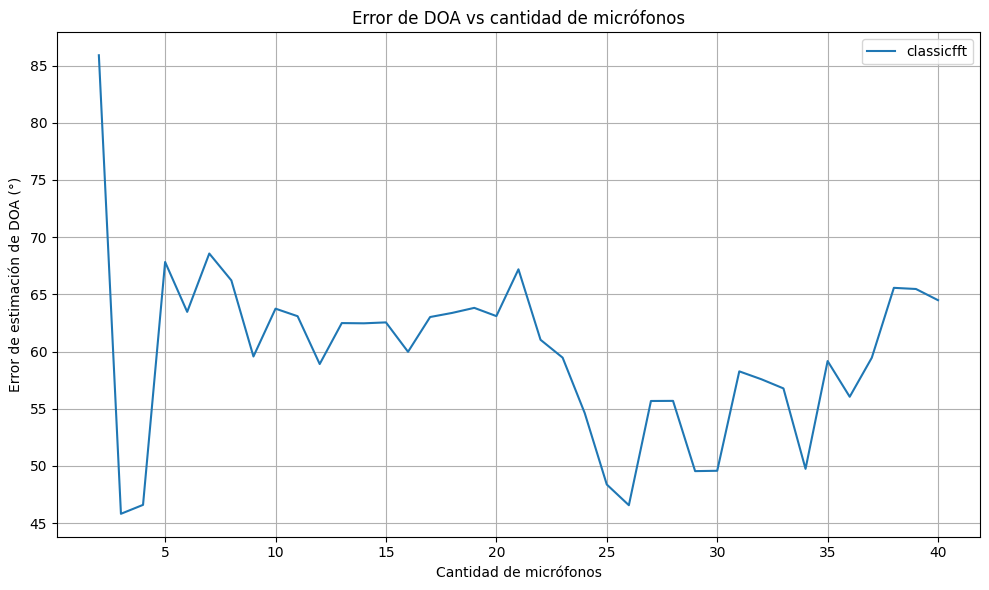

In [21]:
methods = [
    "classicfft",
    #"phat",
    #"scot",
    #"roth",
    #"ml"
]

plt.figure(figsize=(10,6))

for method in methods:
    print(f"Running method: {method}")
    rt60_vals, error_vals = doa.full_doa_pipeline(
        "variacion_mic_amount.json",
        "Audios/imp.wav",
        method=method,
        variable_param="mic_amount",
        return_error=False
    )
    # En caso de que error_vals sea lista de listas, hago media
    if isinstance(error_vals[0], (list, np.ndarray)):
        mean_errors = [np.mean(e) for e in error_vals]
    else:
        mean_errors = error_vals
    plt.plot(rt60_vals, mean_errors, label=method)

plt.xlabel("Cantidad de micrófonos")
plt.ylabel("Error de estimación de DOA (°)")
plt.title("Error de DOA vs cantidad de micrófonos")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Elevación fuente

In [ ]:
methods = [
    "classicfft",
    #"phat",
    #"scot",
    #"roth",
    #"ml"
]


plt.close('all')  # 🔧 Limpia cualquier gráfico previo
plt.figure(figsize=(10, 6))

for method in methods:
    print(f"Running method: {method}")
    rt60_vals, error_vals = doa.full_doa_pipeline(
        "variacion_source_pos.json",
        "Audios/imp.wav",
        method=method,
        variable_param="source_pos",
        return_error=True
    )

    # Promediar si vienen múltiples valores por punto
    if isinstance(error_vals[0], (list, np.ndarray)):
        error_vals = np.array(error_vals)
        mean_errors = np.mean(error_vals, axis=1)
    else:
        mean_errors = error_vals

    plt.plot(rt60_vals, mean_errors, label=method)

plt.xlabel("Elevación de fuente")
plt.ylabel("Error de estimación de DOA (°)")
plt.title("Error de DOA vs elevación fuente")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

